In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv('gld_price_data.csv')

In [3]:
#Lets have a quick look of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
#Clearly we see there is no null value in the dataset
#Lets study the Statistical Inferance of the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Text(0.5, 1.05, 'Correlation of df Features')

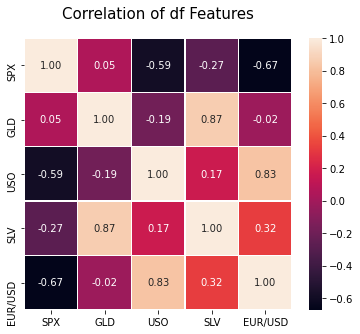

In [5]:
#Now see the correlation matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)

In [6]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



D:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


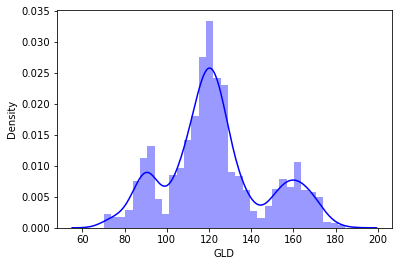

In [7]:
#Lets Check our target variable
sns.distplot(df['GLD'], color = 'blue')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

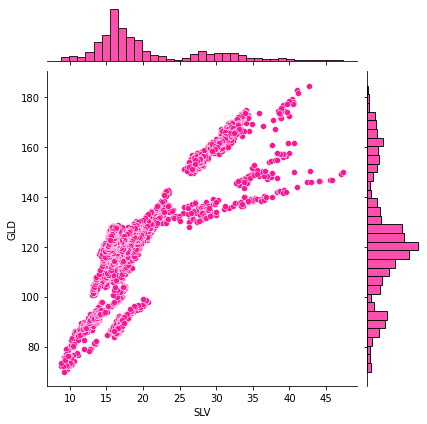

In [8]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'deeppink')

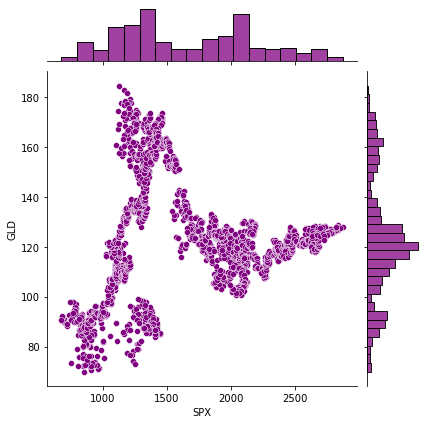

In [9]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'purple')

In [10]:
#Now Lets create a ml model
# Now lets take our matrix of feature and target
x_trail = df[['SPX','USO','SLV','EUR/USD']]
x = x_trail.iloc[:, :].values
y = df.iloc[:, 2].values

In [11]:
#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [12]:
#Now fitting the Random forest regression to the traning set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [13]:
#Now predicting the test set result
y_pred = regressor.predict(x_test)

In [14]:
#Now Check the error for regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.297793151724892
MSE :   5.16257387057774
RMAE :   2.272129809358994


In [15]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9984324726699736
0.9899648553789232


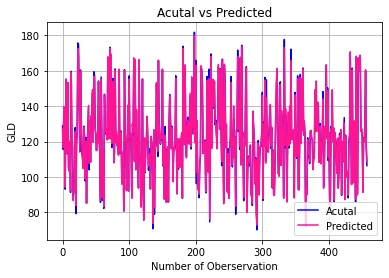

In [16]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

In [17]:
# Displaying the predicted values

y_pred

array([127.11519861, 116.75389919, 139.64640069, 121.84449996,
        94.16690037, 155.39120046, 117.54780113, 113.35050113,
       153.44089984, 105.56870046, 103.22629882, 120.27290084,
        92.02489943, 159.13370062, 121.44209864, 117.43930097,
        86.60659837,  91.83999934,  92.9420998 , 125.58319999,
        83.81939914, 117.61189833, 126.15909843, 172.60959729,
       168.24839714, 139.56230262, 114.2682995 , 159.86910228,
       133.47620133, 115.68370012, 110.98790099, 104.68350184,
       128.26529987, 122.0387    ,  98.8036998 , 120.18919953,
        85.07499988, 114.99030011, 127.32199864, 140.42899853,
       107.65770049, 131.61690135, 108.26699972, 134.65220058,
       133.53169916, 149.28329945, 119.62220064, 156.90000052,
       156.80590136, 127.58380013, 123.8733001 , 114.95029846,
       123.92690041, 119.08869989, 153.83670055, 121.4558995 ,
       112.25060008,  86.88879954, 155.34909997, 117.88850108,
        88.12159929, 114.65729994,  83.17699948, 146.34

In [18]:
# Predicting for a random train values by using rf regressor



In [20]:
regressor.predict([[1247,73.8,16.90,1.3]])

array([89.89109993])

In [21]:
# So the price of gold for the above given inputs is predicted to be 89

# The End